In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import datetime
from IPython.display import clear_output
from datetime import timedelta
from scipy.stats import skewnorm
import inspect, re
import h2o
from h2o.automl import H2OAutoML
import xgboost as xgb
               
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
fy_10 = pd.read_csv('fy_10.csv')
fy_11 = pd.read_csv('fy_11.csv')
fy_12 = pd.read_csv('fy_12.csv')
fy_13 = pd.read_csv('fy_13.csv')
fy_14 = pd.read_csv('fy_14.csv')
fy_15 = pd.read_csv('fy_15.csv')

In [31]:
train_list = [fy_10, fy_11, fy_12, fy_13]
test_list = [fy_14, fy_15]

X_train = pd.concat(train_list).drop(['OA_Difference','Actuals','Current Budget'], axis=1)
X_test = pd.concat(test_list).drop(['OA_Difference', 'Actuals', 'Current Budget'], axis = 1)
y_train = pd.concat(train_list)['OA_Difference']
y_test = pd.concat(test_list)['OA_Difference']

df_train = pd.concat(train_list)
df_test = pd.concat(test_list)

df_all = pd.concat(train_list+test_list)

In [32]:
non_one_hot = ['Fund Id', 'Business Area', 'Fund Center Id', 'GL Account',
       'GL Description', 'GL Category', 'GL Category Description',
       'Revenue or Expenditure', 'Original Budget', 'Current Budget',
       'Actuals', 'OA_Difference', 'Yearly Crime Index',
       'Yearly Avg High Temp', 'Yearly Avg Low Temp', 'Yearly Rain Fall',
       'Astros Playoff Rounds', 'Astros Yearly Attendance',
       'Rockets Playoff Rounds', 'Texans Playoff Rounds',
       'Texans Average Attendance', 'Rockets Total Attendance']

categorical = ['GL Description','GL Category Description','Revenue or Expenditure']

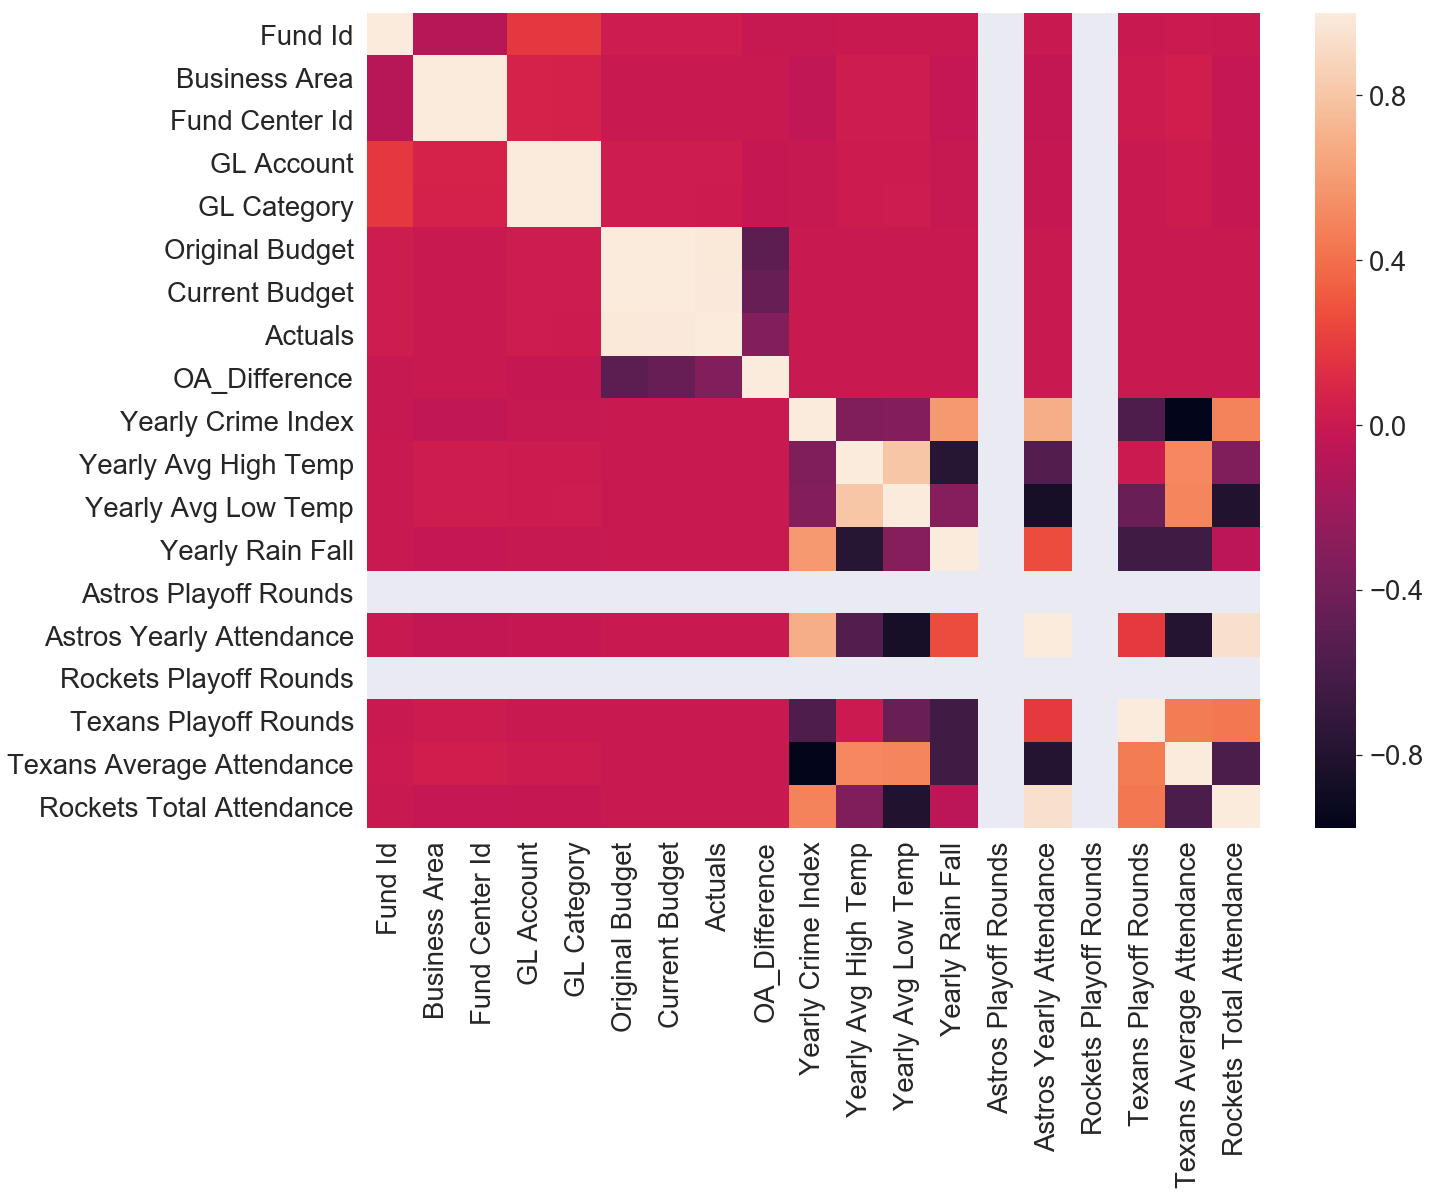

In [33]:
sns.set_style('darkgrid')
sns.set(font_scale=2.5)
 
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(df_train[non_one_hot].drop(categorical, axis=1).corr(), ax=ax)

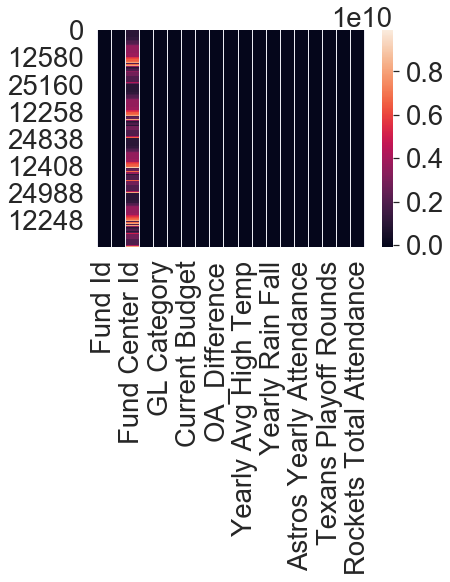

In [34]:
sns.heatmap(df_train[non_one_hot].drop(categorical, axis=1))

In [35]:
df_train['Revenue or Expenditure'].value_counts()

Expenditures    100633
Name: Revenue or Expenditure, dtype: int64

In [ ]:
df_train[non_one_hot].drop(categorical, axis=1).corr()

In [40]:
pandas_profiling.ProfileReport(df_all)

In [41]:
fy_10.head(200)

Unnamed: 0  Fund Name_Asset Forfeiture Fund - Justice  \
0             0                                          0   
1             1                                          0   
2             2                                          0   
3             3                                          0   
4             4                                          0   
5             5                                          0   
6             6                                          0   
7             7                                          0   
8             8                                          0   
9             9                                          0   
10           10                                          0   
11           11                                          0   
12           12                                          0   
13           13                                          0   
14           14                                          0   
15           15                                          0   
16           16                                          0   
17           17                                          0   
18           18                                          0   
19           19                                          0   
20           20                                          0   
21           21                                          0   
22           22                                          0   
23           23                                          0   
24           24                                          0   
25           25                                          0   
26           26                                          0   
27           27                                          0   
28           28                                          0   
29           29                                          0   
30           30                                          0   
31           31                                          0   
32           32                                          0   
33           33                                          0   
34           34                                          0   
35           35                                          0   
36           36                                          0   
37           37                                          0   
38           38                                          0   
39           39                                          0   
40           40                                          0   
41           41                                          0   
42           42                                          0   
43           43                                          0   
44           44                                          0   
45           45                                          0   
46           46                                          0   
47           47                                          0   
48           48                                          0   
49           49                                          0   
50           50                                          0   
51           51                                          0   
52           52                                          0   
53           53                                          0   
54           54                                          0   
55           55                                          0   
56           62                                          0   
57           63                                          0   
58           64                                          0   
59           65                                          0   
60           66                                          0   
61           67                                          0   
62           68                                          0   
63           69                      

In [43]:
type(fy_10['Fiscal Year'][0])

numpy.int64

In [45]:
m = [0,1,3,4,5,6,7]

In [50]:
m[1:5]

[1, 3, 4, 5]